# **Команда 22. Анализ популярности статей**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

https://www.kaggle.com/datasets/deepakshende/onlinenewspopularity

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ПРОЕКТЫ_ABD/Команда_22/OnlineNewsPopularity.csv')
pd.set_option('display.max_columns', None)
df.columns = df.columns.str.strip()

df.sample(3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
18390,http://mashable.com/2014/01/06/nike-fuelband-c...,367.0,11.0,121.0,0.735537,1.0,0.820513,2.0,2.0,0.0,1.0,4.727273,7.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,723.0,103.908571,7700.0,843300.0,542771.428571,2964.600000,6857.379857,4620.437798,944.0,944.0,944.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.636330,0.028580,0.028572,0.277946,0.028572,0.408749,0.098690,0.123967,0.033058,0.789474,0.210526,0.255960,0.100000,0.5,-0.428571,-0.5,-0.214286,0.4,-0.3,0.1,0.3,9500
20028,http://mashable.com/2014/02/06/what-city-ready...,335.0,10.0,1206.0,0.320388,1.0,0.392535,15.0,2.0,35.0,0.0,5.023217,9.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,480.0,242.954444,11800.0,843300.0,363022.222222,2039.636364,8773.433333,4148.401099,1000.0,4900.0,2950.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.337009,0.022400,0.022375,0.485098,0.133117,0.325380,0.038945,0.017413,0.011609,0.600000,0.400000,0.316215,0.050000,0.6,-0.306250,-0.5,-0.187500,0.0,0.0,0.5,0.0,2400
93,http://mashable.com/2013/01/09/amazon-predicti...,729.0,9.0,759.0,0.498667,1.0,0.692810,17.0,9.0,1.0,0.0,4.657444,6.0,0.0,0.0,1.0,0.0,0.0,0.0,217.0,690.0,444.000000,0.0,17100.0,3498.333333,0.000000,1953.144444,649.607407,767.0,6800.0,2989.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.866361,0.033407,0.033353,0.033381,0.033499,0.601257,0.107640,0.040843,0.009223,0.815789,0.184211,0.283895,0.033333,0.7,-0.349405,-0.5,-0.200000,0.0,0.0,0.5,0.0,459


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [5]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

Описание признаков

|№|Столбец|Eng|Рус|тип данных|
|--|-----|---|-- |---|
|1.|  url |URL of the article| URL адрес источника|
|2.|  timedelta|Days between the article publication and the dataset acquisition|кол-во дней между публикацией до получения данных|КолДискр|
|3.|  n_tokens_title|Number of words in the title|кол-во слов в заголовке|КолДискр|
|4.|  n_tokens_content|Number of words in the content|кол-во слов в статье|КолДискр|
|5.|  n_unique_tokens|Rate of unique words in the content|доля уникальных слов в статье|КолНепр|
|6.|  n_non_stop_words|Rate of non-stop words in the content|доля нонстоп-слов в статье|КолНепр|
|7.|  n_non_stop_unique_tokens|Rate of unique non-stop words in the content|доля уникальных нонстоп-слов в статье|КолНепр|
|8.|  num_hrefs|Number of links|кол-во ссылок в статье|КолДискр|
|9.|  num_self_hrefs|Number of links to other articles published by Mashable|кол-во ссылок на другие статьи, опубликованные в Mashable|КолДискр|
|10.| num_imgs|Number of images|кол-во изображений в статье|КолДисрк|
|11.| num_videos|Number of videos|кол-во видео в статье|КолДискр|
|12.| average_token_length|Average length of the words in the content|средняя длина слов в статье|КолНепр|
|13.| num_keywords|Number of keywords in the metadata|кол-во ключевых слов в метаданных|КолДиск|
|14.| data_channel_is_lifestyle|Is data channel 'Lifestyle'?|из рубрики 'Lifestyle'?|КатБином|
|15.| data_channel_is_entertainment|Is data channel 'Entertainment'?|из рубрики 'Entertainment'?|КатБином|
|16.| data_channel_is_bus|Is data channel 'Business'?|из рубрики 'Business'?|КатБином|
|17.| data_channel_is_socmed|Is data channel 'Social Media'?|из рубрики 'Social Media'?|КатБином|
|18.| data_channel_is_tech|Is data channel 'Tech'?|из рубрики 'Tech'?|КатБином|
|19.| data_channel_is_world|Is data channel 'World'?|из рубрики 'World'?|КатБином|
|20.| kw_min_min|Worst keyword (min. shares)|худшее ключевое слово (мин кол-во cсылок)|ЧД|
|21.| kw_max_min|Worst keyword (max. shares)|худшее ключевое слово (макс. кол-во cсылок)|ЧД? (что с 1.59)|
|22.| kw_avg_min|Worst keyword (avg. shares)|худшее ключевое слово (средн. кол-во cсылок)|ЧН|
|23.| kw_min_max|Best keyword (min. shares)|лучшее ключевое слово (мин. кол-во cсылок)|ЧД|
|24.| kw_max_max|Best keyword (max. shares)|лучшее ключевое слово (макс. кол-во cсылок)|ЧД|
|25.| kw_min_avg|Best keyword (avg. shares)|лучшее ключевое слово (средн. кол-во cсылок)|ЧН|
|26.| kw_min_avg|Avg. keyword (min. shares)|среднее ключевое слово (средн. кол-во cсылок)|ЧН|
|27.| kw_max_avg|Avg. keyword (max. shares)|среднее ключевое слово (макс.  кол-во cсылок)|ЧН|
|28.| kw_avg_avg|Avg. keyword (avg. shares)|среднее ключевое слово (средн.  кол-во cсылок)|ЧН|
|29.| self_reference_min_shares|Min. shares of referenced articles in Mashable|мин. кол-во упоминаемых статей в Mashable|ЧД (но 1.59)|
|30.| self_reference_max_shares|Max. shares of referenced articles in Mashable|макс. кол-во упоминаемых статей в Mashable|ЧД (но 1.59)|
|31.| self_reference_avg_sharess|Avg. shares of referenced articles in Mashable|средн. кол-во упоминаемых статей в Mashable|ЧН|
|32.| weekday_is_monday|Was the article published on a Monday?|день публикации 'Понедельник'?|КатБином|
|33.| weekday_is_tuesday|Was the article published on a Tuesday?|день публикации 'Вторник'?|КатБином|
|34.| weekday_is_wednesday|Was the article published on a Wednesday?|день публикации 'Среда'?|КатБином|
|35.| weekday_is_thursday|Was the article published on a Thursday?|день публикации 'Четверг'?|КатБином|
|36.| weekday_is_friday|Was the article published on a Friday?|день публикации 'Пятница'?|КатБином|
|37.| weekday_is_saturda|Was the article published on a Saturday?|день публикации 'Суббота'|КатБином|
|38.| weekday_is_sunday|Was the article published on a Sunday?|день публикации 'Воскресенье'?|КатБином|
|39.| is_weekend|Was the article published on the weekend?|день публикации 'Выходные'|КатБином|
|40.| LDA_00|Closeness to LDA topic 0|близость LDA (Latent Dirichlet Allocation):  0|КолНепр|
|41.| LDA_01|Closeness to LDA topic 1|близость LDA (Latent Dirichlet Allocation):  1|КолНепр|
|42.| LDA_02|Closeness to LDA topic 2|близость LDA (Latent Dirichlet Allocation): 2|КолНепр|
|43.| LDA_03|Closeness to LDA topic 3|близость LDA (Latent Dirichlet Allocation):  3|КолНепр|
|44.| LDA_04|Closeness to LDA topic 4|близость LDA (Latent Dirichlet Allocation):  4|КолНепр|
|45.| global_subjectivity|Text subjectivity|субъективность текста|ЧН|
|46.| global_sentiment_polarity|Text sentiment polarity|общая полярность настроения текста|ЧН|
|47.| global_rate_positive_words|Rate of positive words in the content|доля позитивных слов в статье|ЧН|
|48.| global_rate_negative_words|Rate of negative words in the content|доля негативных слов в статье|ЧН|
|49.| rate_positive_words|Rate of positive words among non-neutral tokens|доля позитивных слов среди не нейтральных слов|ЧН|
|50.| rate_negative_words|Rate of negative words among non-neutral tokens|доля негативных слов среди не нейтральных слов|ЧН|
|51.| avg_positive_polarity|Avg. polarity of positive words|средн. полярность положительных слов|ЧН|
|52.| min_positive_polarity|Min. polarity of positive words|мин. полярность положительных слов|ЧН|
|53.| max_positive_polarity|Max. polarity of positive words|макс. полярность положительных слов|ЧН|
|54.| avg_negative_polarity|Avg. polarity of negative words|средн. полярность отрицательных слов|ЧН|
|55.| min_negative_polarity|Min. polarity of negative words|мин. полярность отрицательных слов|ЧН|
|56.| max_negative_polarity|Max. polarity of negative words|макс. полярность отрицательных слов|ЧН|
|57.| title_subjectivity|Title subjectivity|субъективность заголовка|ЧН|
|58.| title_sentiment_polarity|Title polarity|полярность настроения заголовка|ЧН|
|59.| abs_title_subjectivity|Absolute subjectivity level|уровень абсолютной субъективности заголовка|ЧН|
|60.| abs_title_sentiment_polarity|Absolute polarity level|уровень абсолютой полярности заголовка|ЧН|
|61.| shares|Number of shares|кол-во ссылок|КолДискр|

## Подготовка признаков

### Количественные признаки

#### Популярность (`shares`)

##### Нормализация

In [6]:
df['shares'].describe()

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


In [7]:
# логорифмирование переменной 'shares' и добавление нового признака в df.

df['ln_shares'] = np.log(df['shares'])

##### Удаление выбросов

In [8]:
# фильтрация оставляем чистые даныне и сохраняем в новую переменную

def outlier(col, data):
  """Функция по удалению выбросов более 1.5IQR"""

  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  l = q1 - 1.5*iqr
  r = q3 + 1.5*iqr
  df_new = data[(data[col] > l) & (data[col] < r)]
  return df_new

In [9]:
# df_clean без выбросов ln_shares.

df_clean = outlier('ln_shares', df)

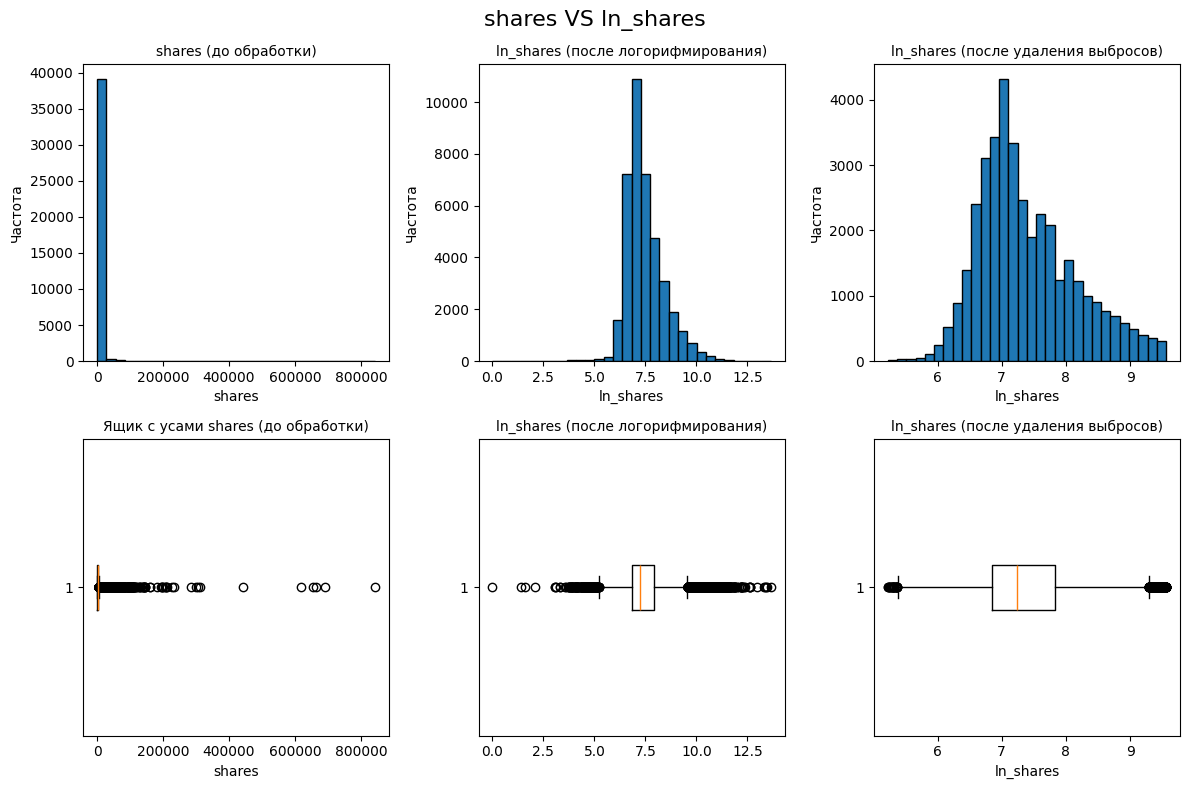

In [10]:
# Визуализация shares и ln_shares  после обработки

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('shares VS ln_shares', fontsize=16)

axes[0, 0].hist(df['shares'], bins=30, edgecolor='black')
axes[0, 0].set_title('shares (до обработки)', fontsize=10)
axes[0, 0].set_xlabel('shares')
axes[0, 0].set_ylabel('Частота')

axes[1, 0].boxplot(df['shares'], vert=False)
axes[1, 0].set_title('Ящик с усами shares (до обработки)', fontsize=10)
axes[1, 0].set_xlabel('shares')

axes[0, 1].hist(df['ln_shares'], bins=30, edgecolor='black')
axes[0, 1].set_title('ln_shares (после логорифмирования)', fontsize=10)
axes[0, 1].set_xlabel('ln_shares')
axes[0, 1].set_ylabel('Частота')

axes[1, 1].boxplot(df['ln_shares'], vert=False)
axes[1, 1].set_title('ln_shares (после логорифмирования)', fontsize=10)

axes[0, 2].hist(df_clean['ln_shares'], bins=30, edgecolor='black')
axes[0, 2].set_title('ln_shares (после удаления выбросов)', fontsize=10)
axes[0, 2].set_xlabel('ln_shares')
axes[0, 2].set_ylabel('Частота')

axes[1, 2].boxplot(df_clean['ln_shares'], vert=False)
axes[1, 2].set_title('ln_shares (после удаления выбросов)', fontsize=10)
axes[1, 2].set_xlabel('ln_shares')

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

#### Остальные количественные

In [11]:

# Список всех признаков df_clean
df_col_list = list(df_clean.columns)

# Список всех количественных признаков df_clean без ln_shares
lst_float = [col for col in df_col_list
             if col != 'ln_shares'
             and df_clean[col].nunique() > 2
             and df_clean[col].dtype == 'float64'
             ]

# количество категориальных бинарных признаков df_clean
lst_binary = [col for col in df_col_list
              if df_clean[col].nunique() == 2]

print(f'кол-во категориальных бинарных признаков: {len(lst_binary)}')
print()
print(f'кол-во количественных признаков: {len(lst_float)}')

кол-во категориальных бинарных признаков: 14

кол-во количественных признаков: 45


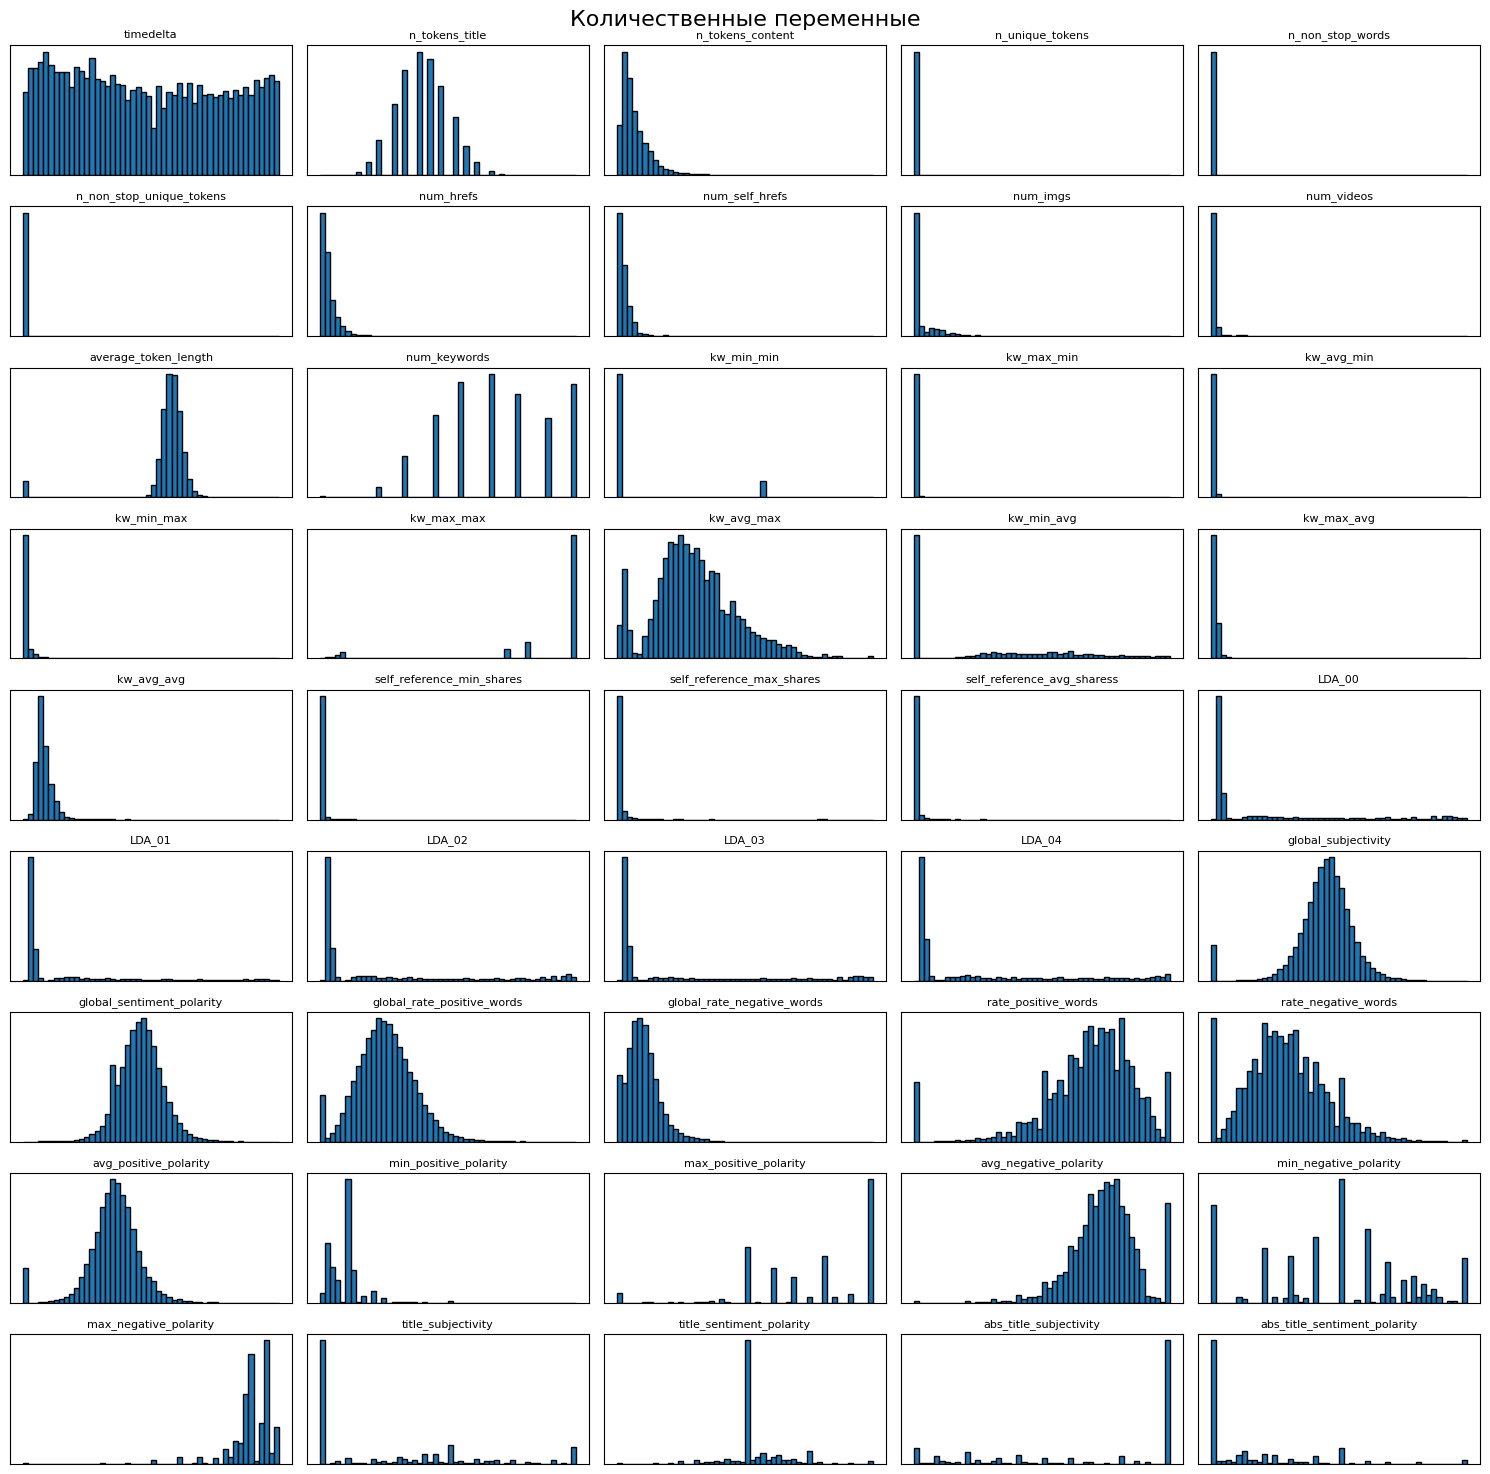

In [12]:
# Построение всех 45-ти количественных переменных для анализа их распределения

# Создаем фигуру 9х5
fig, ax = plt.subplots(9, 5, figsize=(15, 15))
fig.suptitle('Количественные переменные', fontsize=16)
# Преобразуем 2D массив осей в 1D
ax = ax.flatten()

# Построение количественных переменных из lst_float
for idx, col in enumerate(lst_float):
    ax[idx].hist(df_clean[col], bins=50, edgecolor='black')
    ax[idx].set_title(col, fontsize=8)
    ax[idx].get_xaxis().set_visible(False)
    ax[idx].get_yaxis().set_visible(False)
    #ax[idx].axvline(df_clean[col].mean(), color = 'red', label = 'Среднее')
    #ax[idx].axvline(df_clean[col].median(), color = 'orange', label = 'Медиана')

plt.tight_layout()
plt.show()

Количественно оценим изменения в скошенности распределения.

Коэффициент ассиметрии skewness

в нормальном распределении должен быть равен нулю. При этом:
положительные значения говорят о скошенности вправо (positively или right-skewed); отрицательные, о скошенности влево (negatively или left-skewed)



In [13]:
from scipy.stats import skew

# список логарифмированных переменных
lst_float_ln =[]
#
dict_skew ={}

# Выберем переменные со скосом: skew > 1
for col in lst_float:
    dict_skew[col] = skew(df_clean[col])
    if skew(df_clean[col]) > 1:
        lst_float_ln.append(col)

df_clean_ln = pd.DataFrame()
# преобразование обратного гиперболического синуса (inverse hyperbolic sine (IHS) transformation)
for col in lst_float_ln:
    df_clean_ln[col + '_ln'] = df_clean[col].apply(
        lambda x: np.log(x + np.sqrt(x + 1))
    )

#len(lst_float_ln)
#dict_skew

<ipython-input-13-3bc2276dd1cf>:18: RuntimeWarning: invalid value encountered in log
  lambda x: np.log(x + np.sqrt(x + 1))
<ipython-input-13-3bc2276dd1cf>:18: RuntimeWarning: invalid value encountered in log
  lambda x: np.log(x + np.sqrt(x + 1))


In [14]:
df_combined = pd.concat([df_clean, df_clean_ln], axis=1)

<ipython-input-15-4d7ea433e25a>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2, figsize=(8, 4))


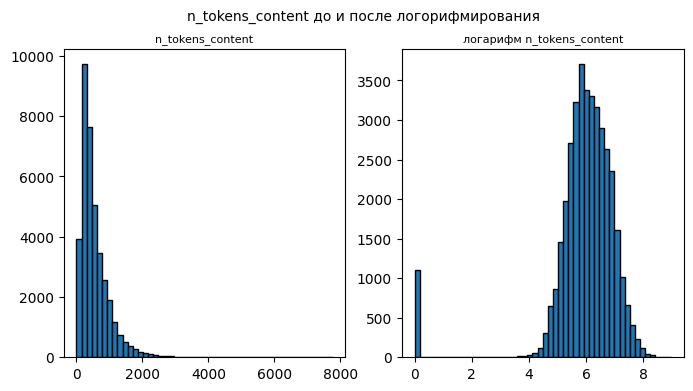

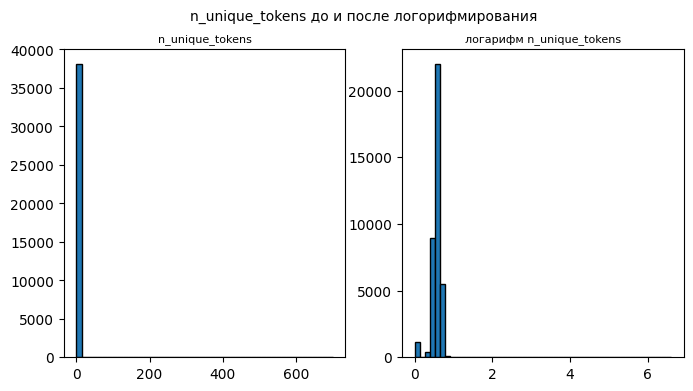

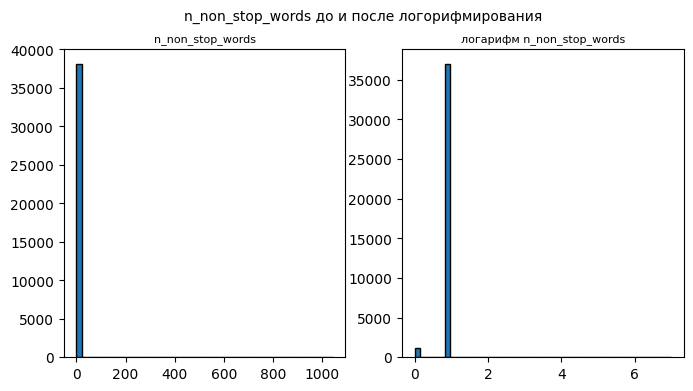

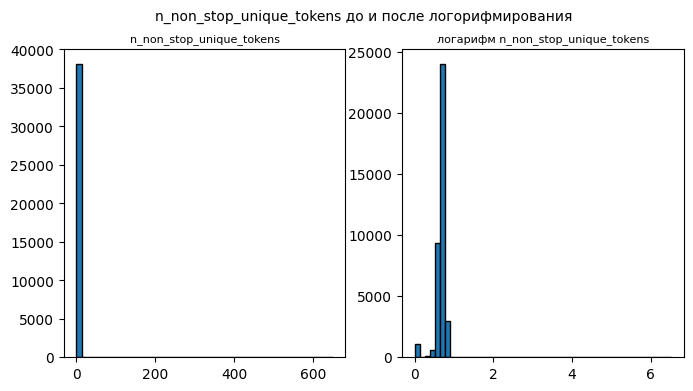

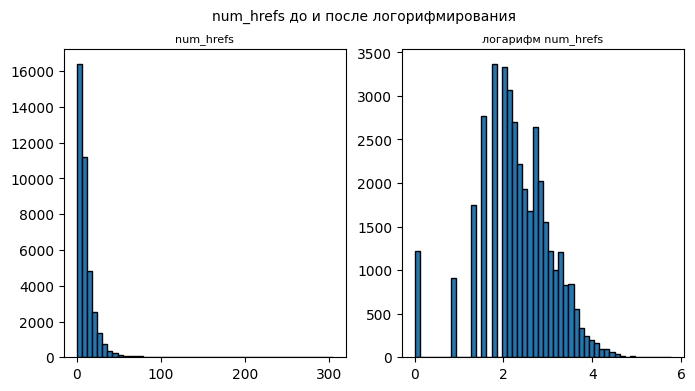

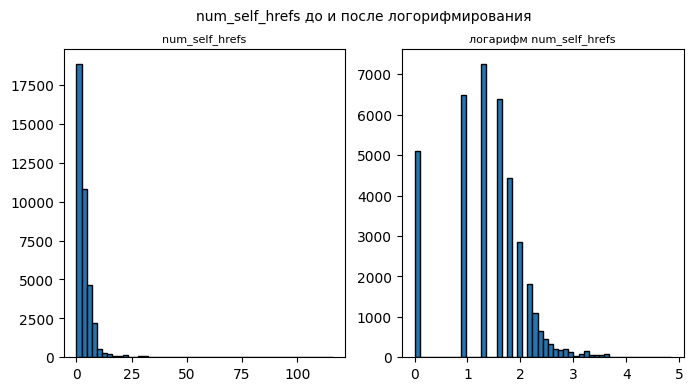

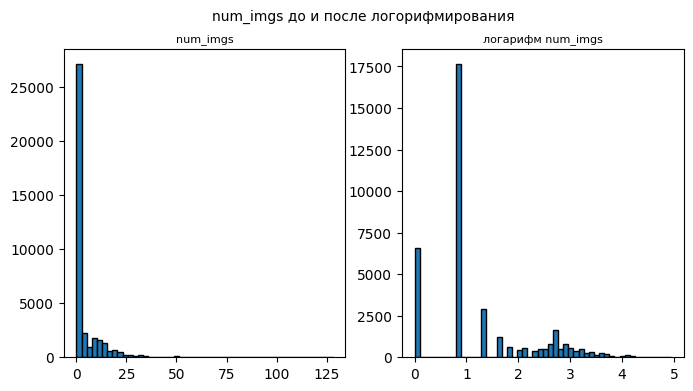

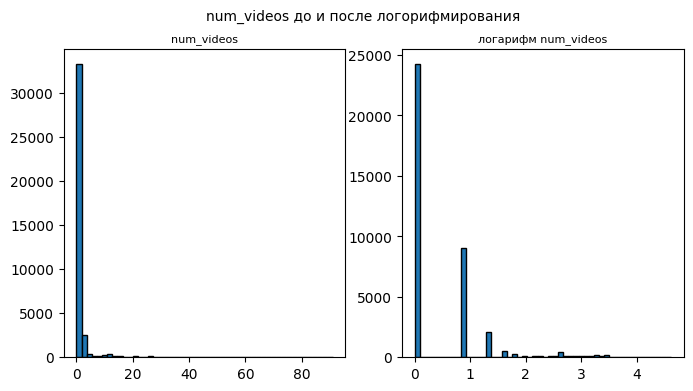

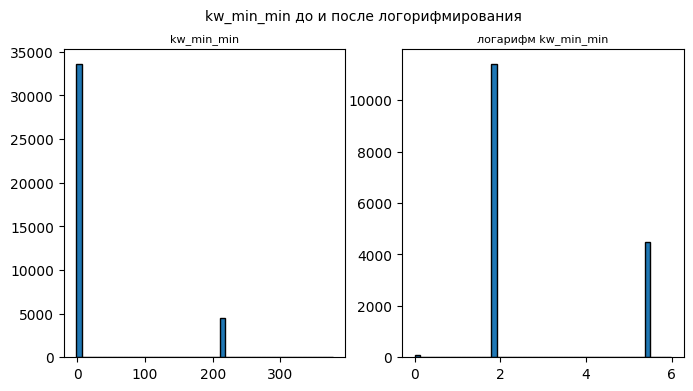

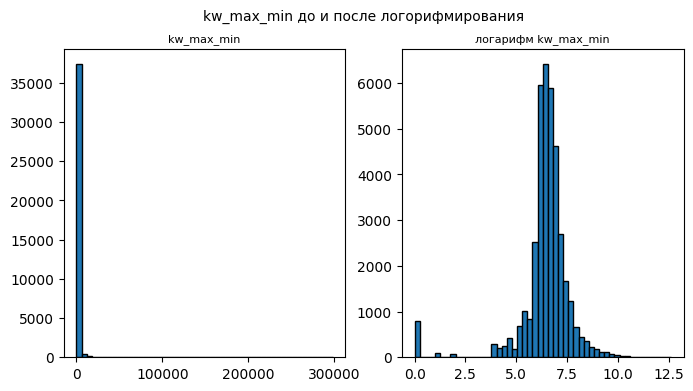

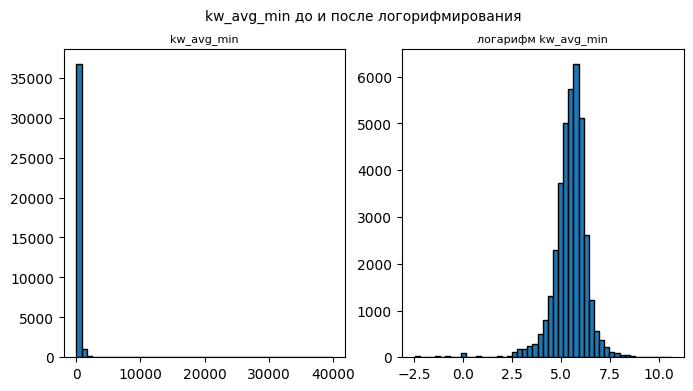

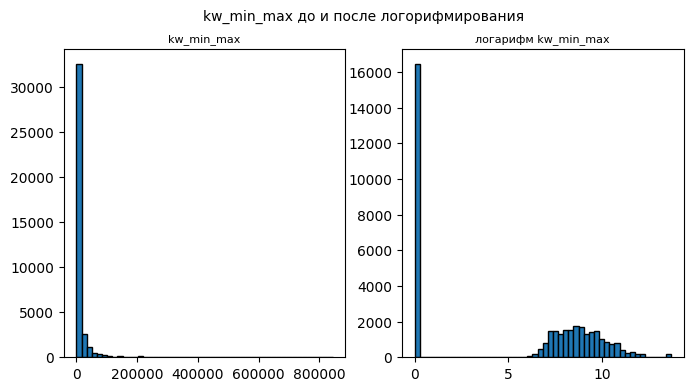

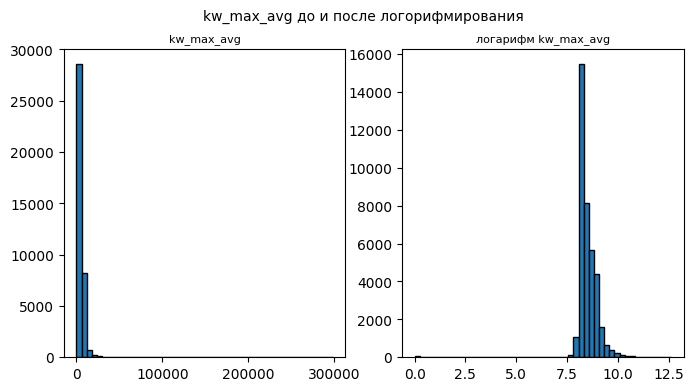

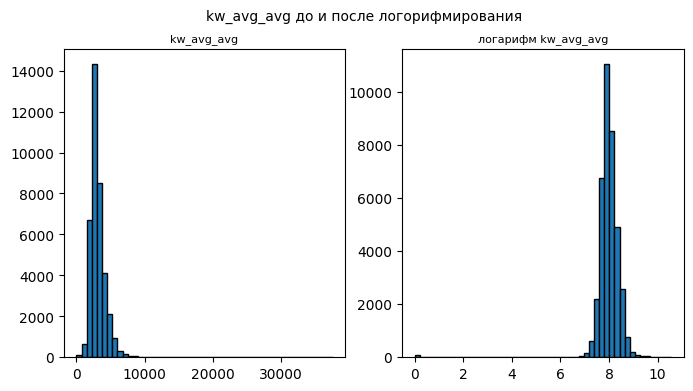

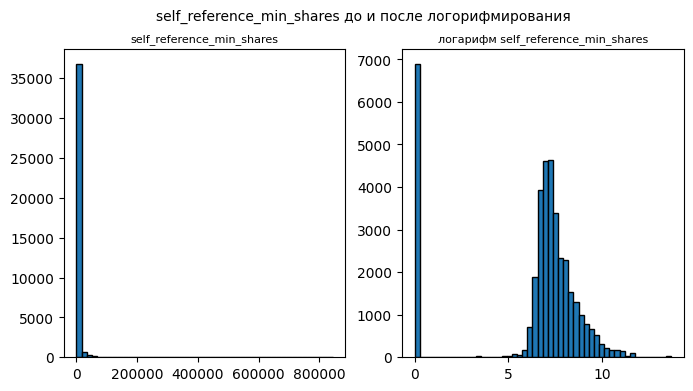

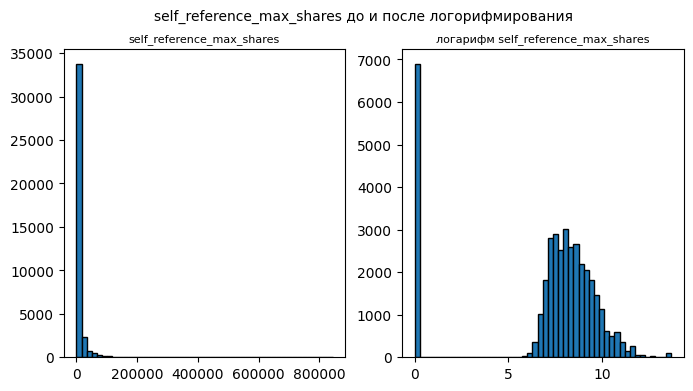

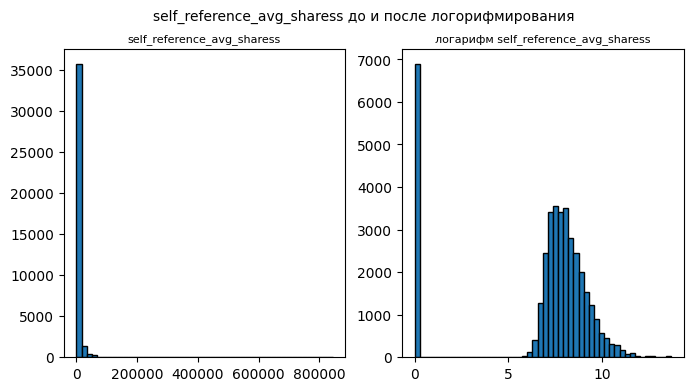

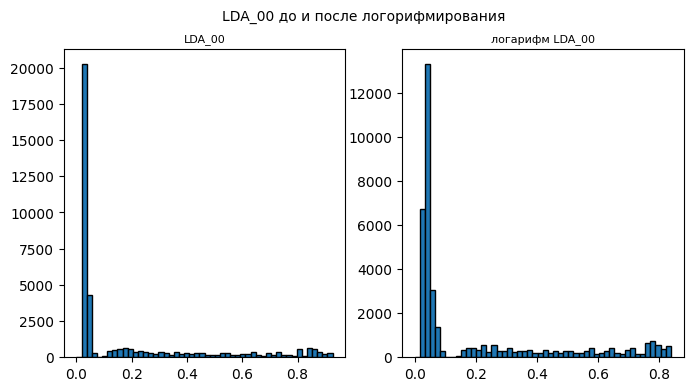

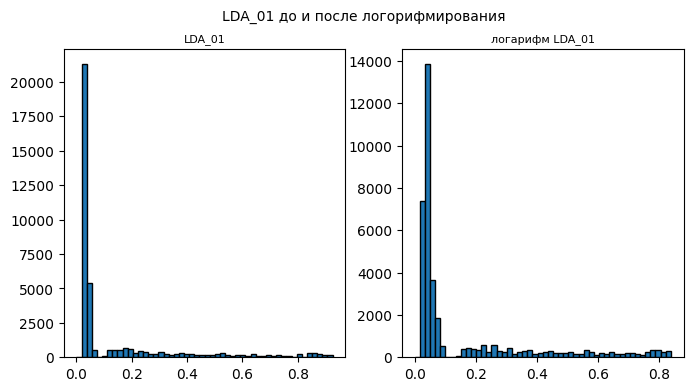

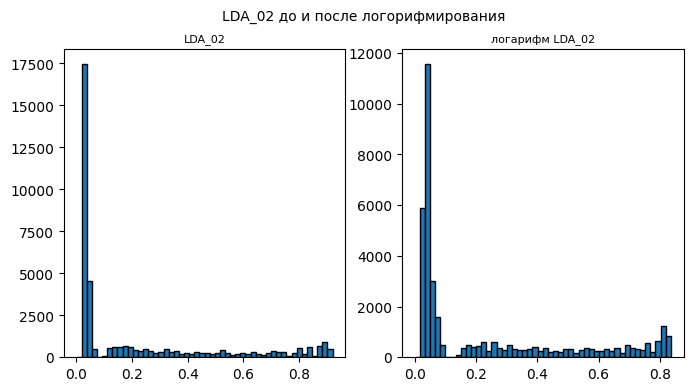

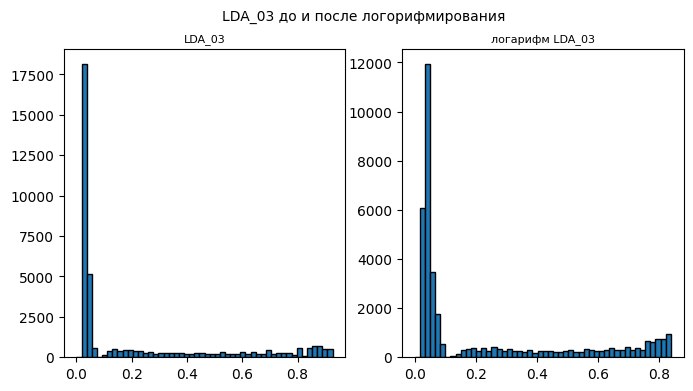

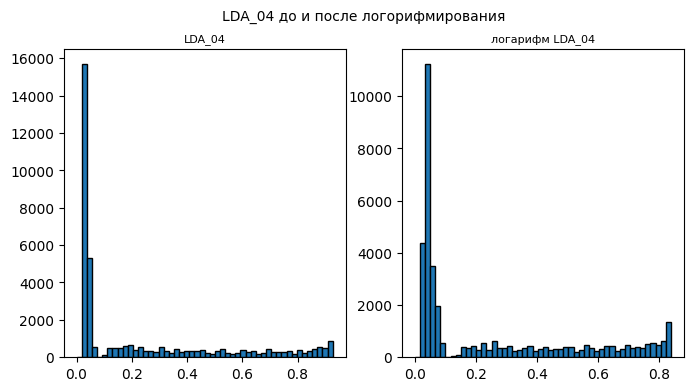

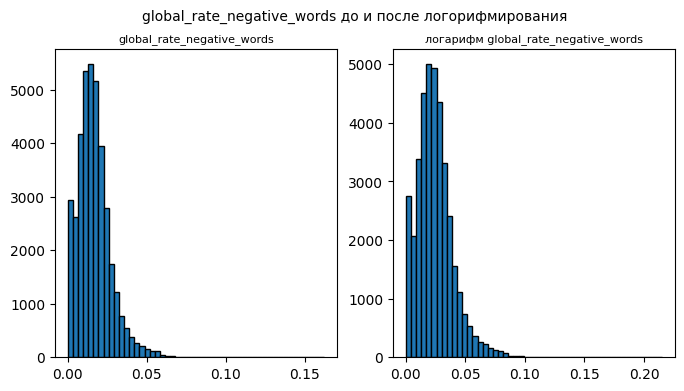

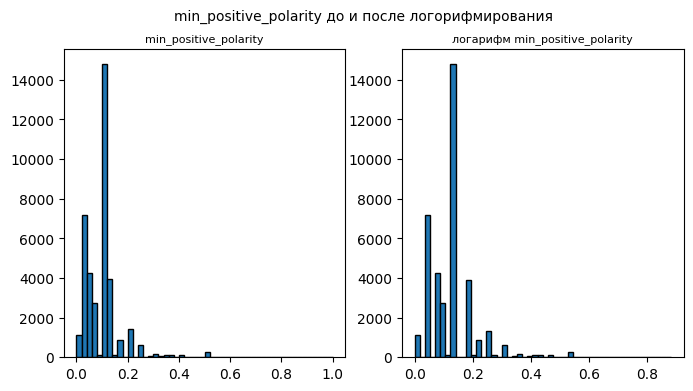

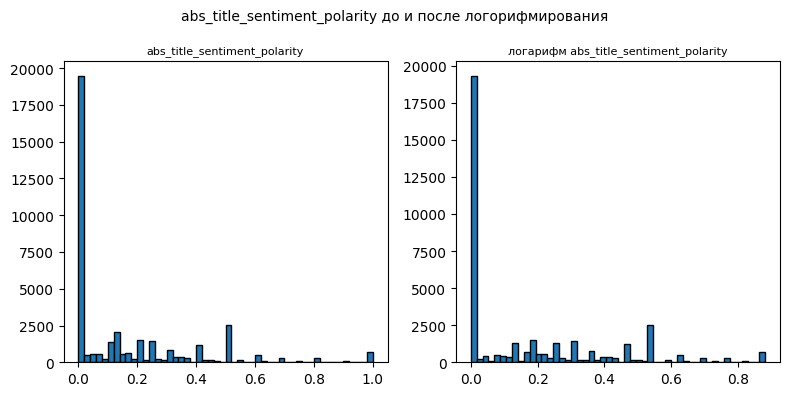

In [15]:
# Построение 25-ти исходных и логарифмированных переменных из lst_float_ln
for col in lst_float_ln:
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    fig.suptitle(f'{col} до и после логорифмирования', fontsize=10)
    ax[0].hist(df_combined[col], bins=50, edgecolor='black')
    ax[0].set_title(col, fontsize=8)
    ax[1].hist(df_combined[col +'_ln'], bins=50, edgecolor='black')
    ax[1].set_title('логарифм '+ col, fontsize=8)

plt.tight_layout()
plt.show()

Вывод:

Логарифмирование не дало нужного эффекта, поэтому работаем с исходными признаками

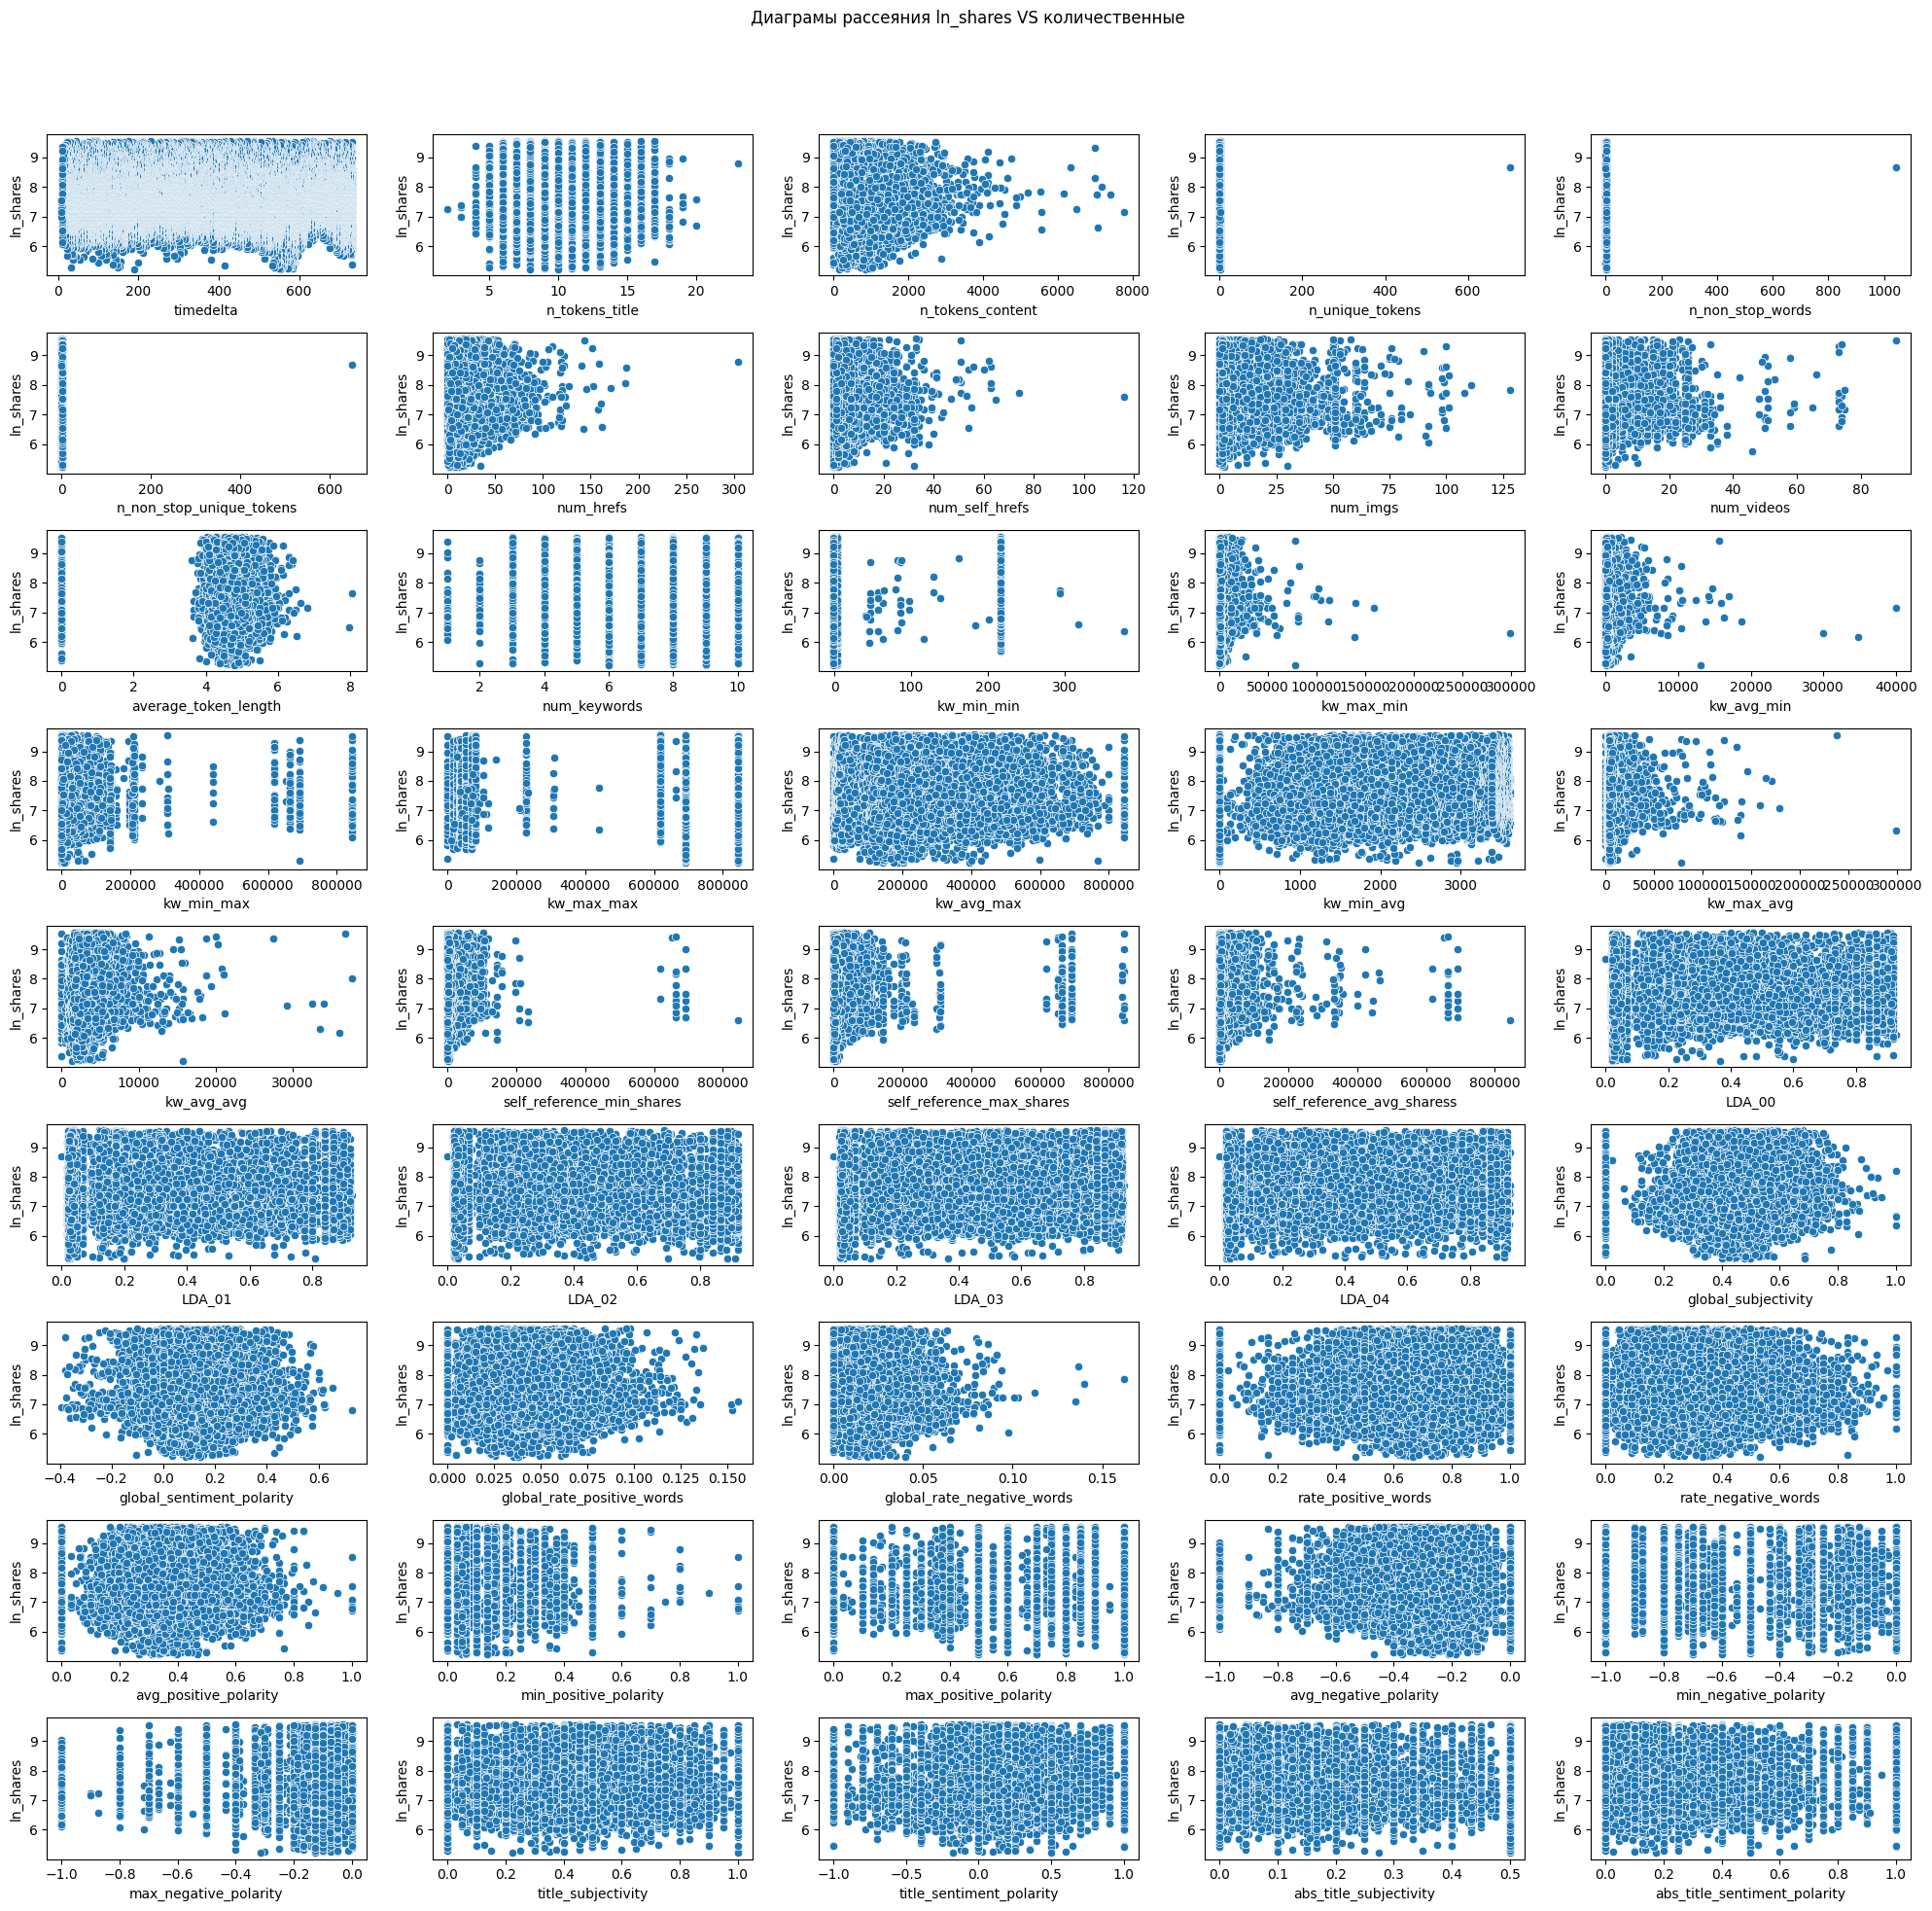

In [16]:
# Диаграмы рассеяния df_clean (ln_shares VS количественные признаки)
fig, ax = plt.subplots(9, 5, figsize=(20, 20))
fig.suptitle('Диаграмы рассеяния ln_shares VS количественные', fontsize=12)
ax = ax.flatten()

for idx, col in enumerate(lst_float):
    sns.scatterplot(x=df_clean[col], y=df_clean['ln_shares'], ax=ax[idx])

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


Ящики-с-усами df_clean (ln_shares VS категориальные)


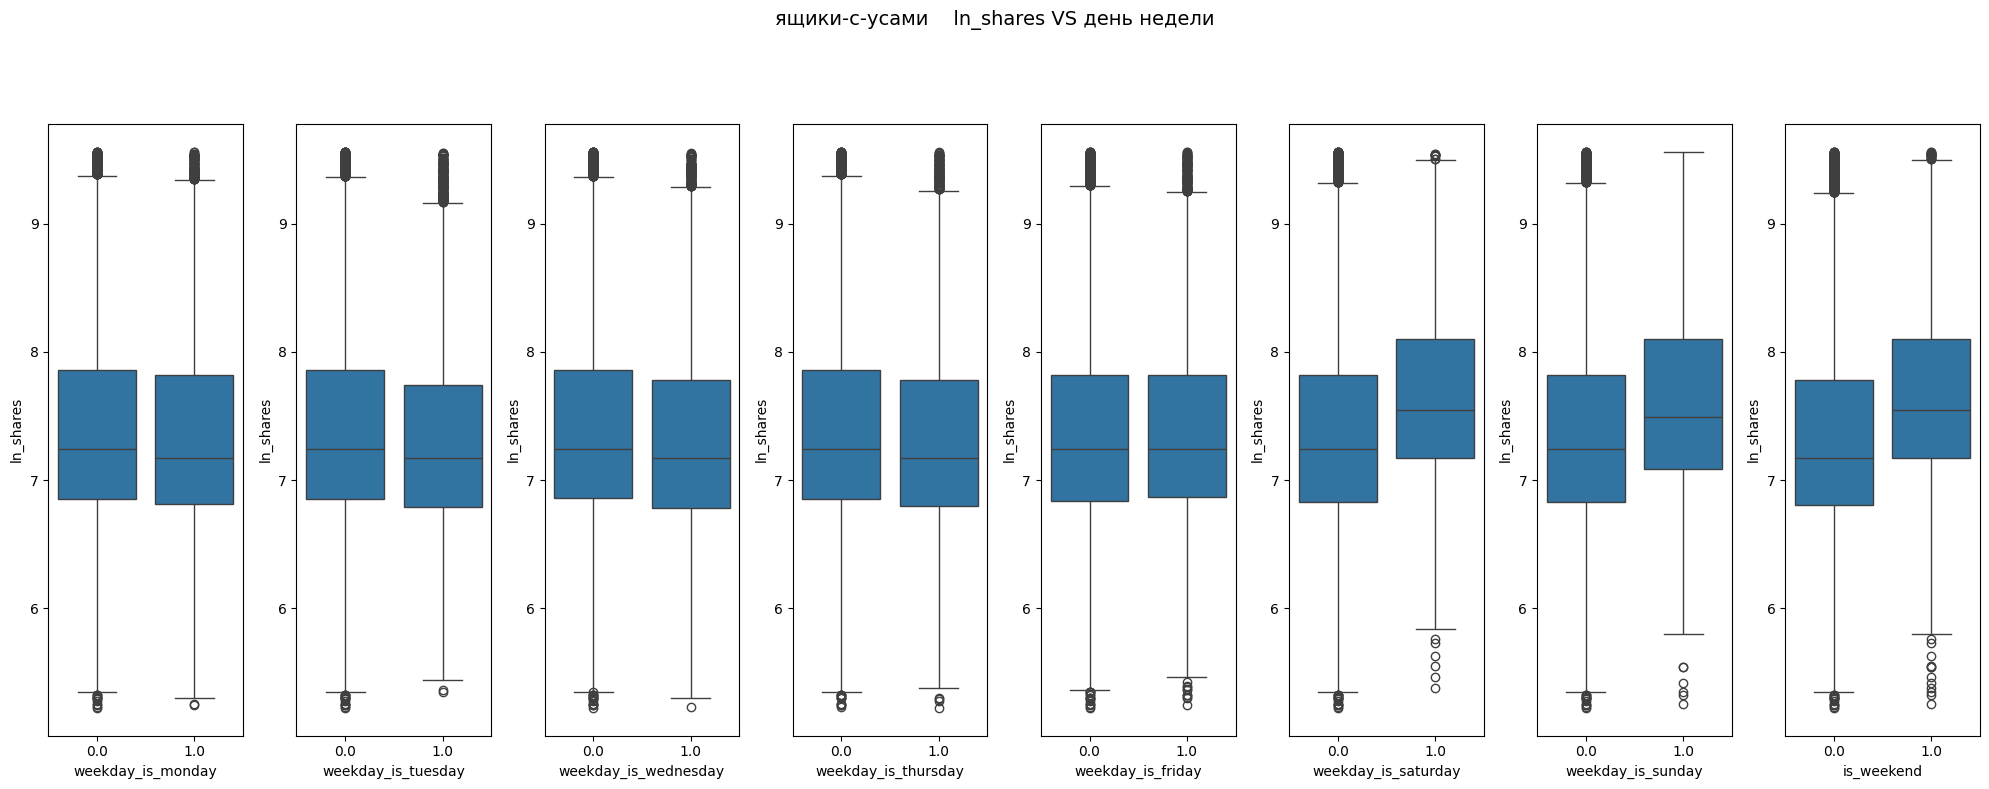

In [17]:
# Зависмомость ln_shares от дня недели
weekday = [day for day in lst_binary if 'week' in day]

fig, ax = plt.subplots(1, 8, figsize=(20, 8))
fig.suptitle('ящики-с-усами    ln_shares VS день недели', fontsize=14)
for idx, col in enumerate(weekday):
   sns.boxplot(x=df_clean[col], y=df_clean['ln_shares'], ax=ax[idx])

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

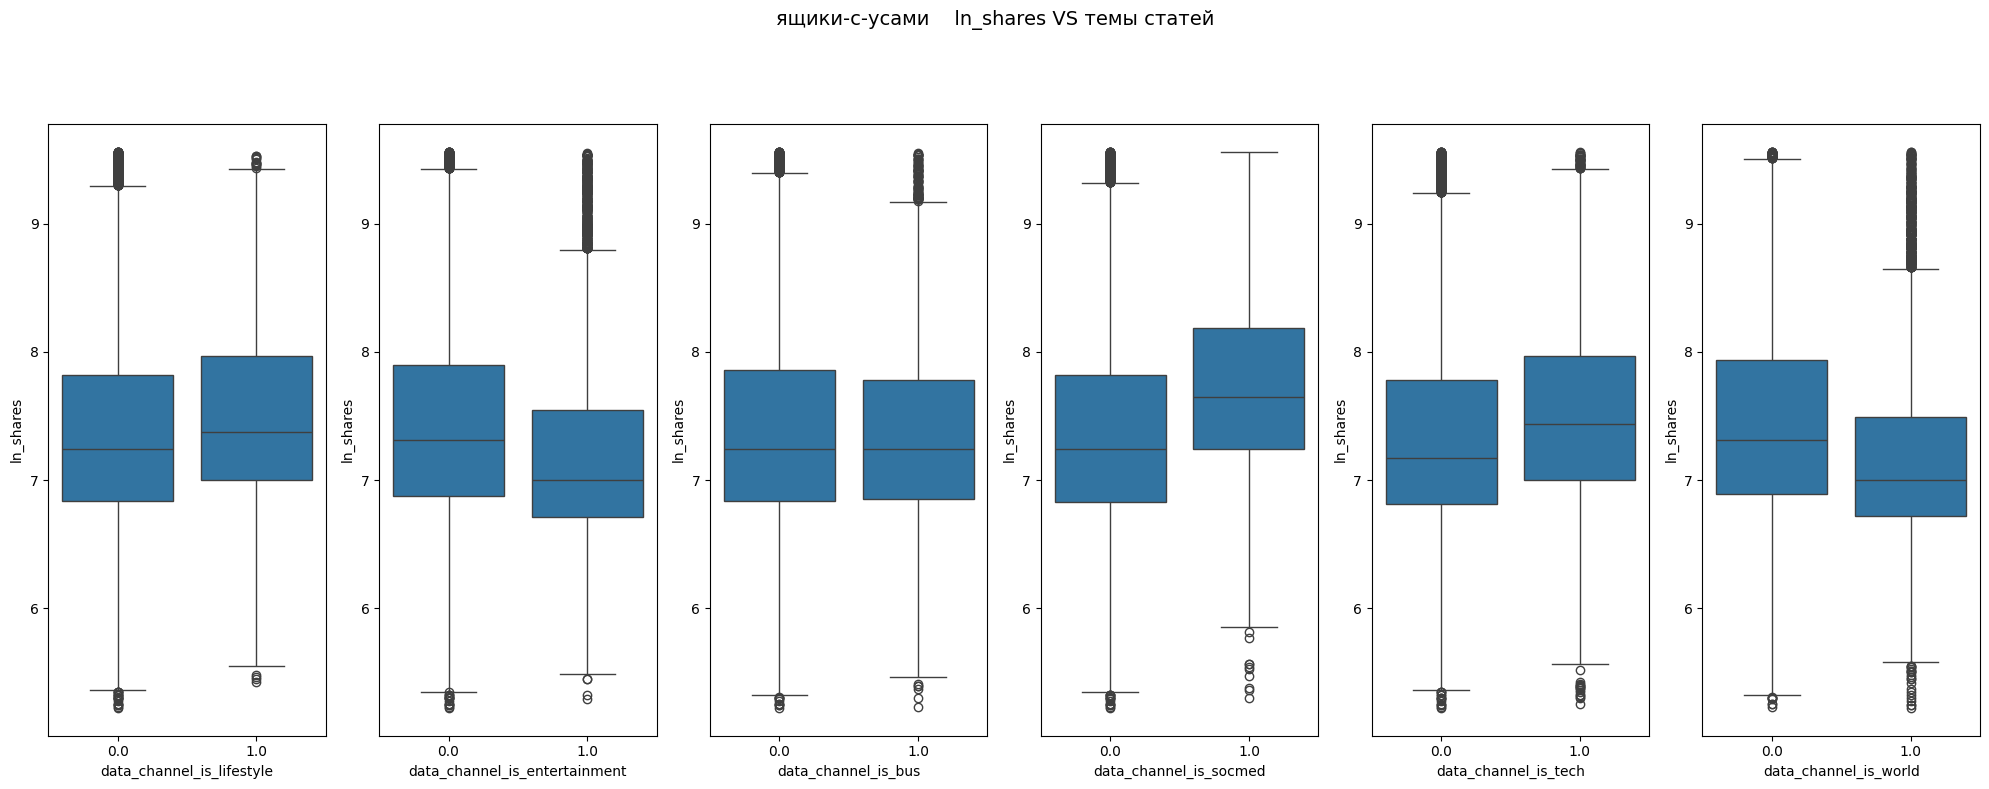

In [18]:
# Зависмомость ln_shares от темы статей
fig, ax = plt.subplots(1, 6, figsize=(20, 8))
fig.suptitle('ящики-с-усами    ln_shares VS темы статей', fontsize=14)
for idx, col in enumerate(lst_binary):
    if col.startswith('data'):
        sns.boxplot(x=df_clean[col], y=df_clean['ln_shares'], ax=ax[idx])

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

Популярность (ln_shares) возрастает в выходные дни.

Среди всех тем статей нет каких-либо явных предпочтенмй


In [82]:
# признаки, где критерий Спирмена > 0.1
THRESHOLD = 0.1

df_clean_drop = df_clean.drop(columns=['url', 'shares'])
corr_spearman = df_clean_drop.corr(numeric_only=True, method='spearman')['ln_shares'].abs().sort_values(ascending=False)
important_features = corr_spearman[corr_spearman > THRESHOLD].reset_index()
df_important = df_clean_drop[important_features['index']]

In [91]:
important_features

,index,ln_shares
0,ln_shares,1.000000
1,kw_avg_avg,0.232024
2,kw_max_avg,0.196972
3,self_reference_avg_sharess,0.173606
4,self_reference_min_shares,0.165508
5,data_channel_is_world,0.161199
6,is_weekend,0.159324
7,self_reference_max_shares,0.151364
8,LDA_02,0.145389
9,data_channel_is_entertainment,0.124592


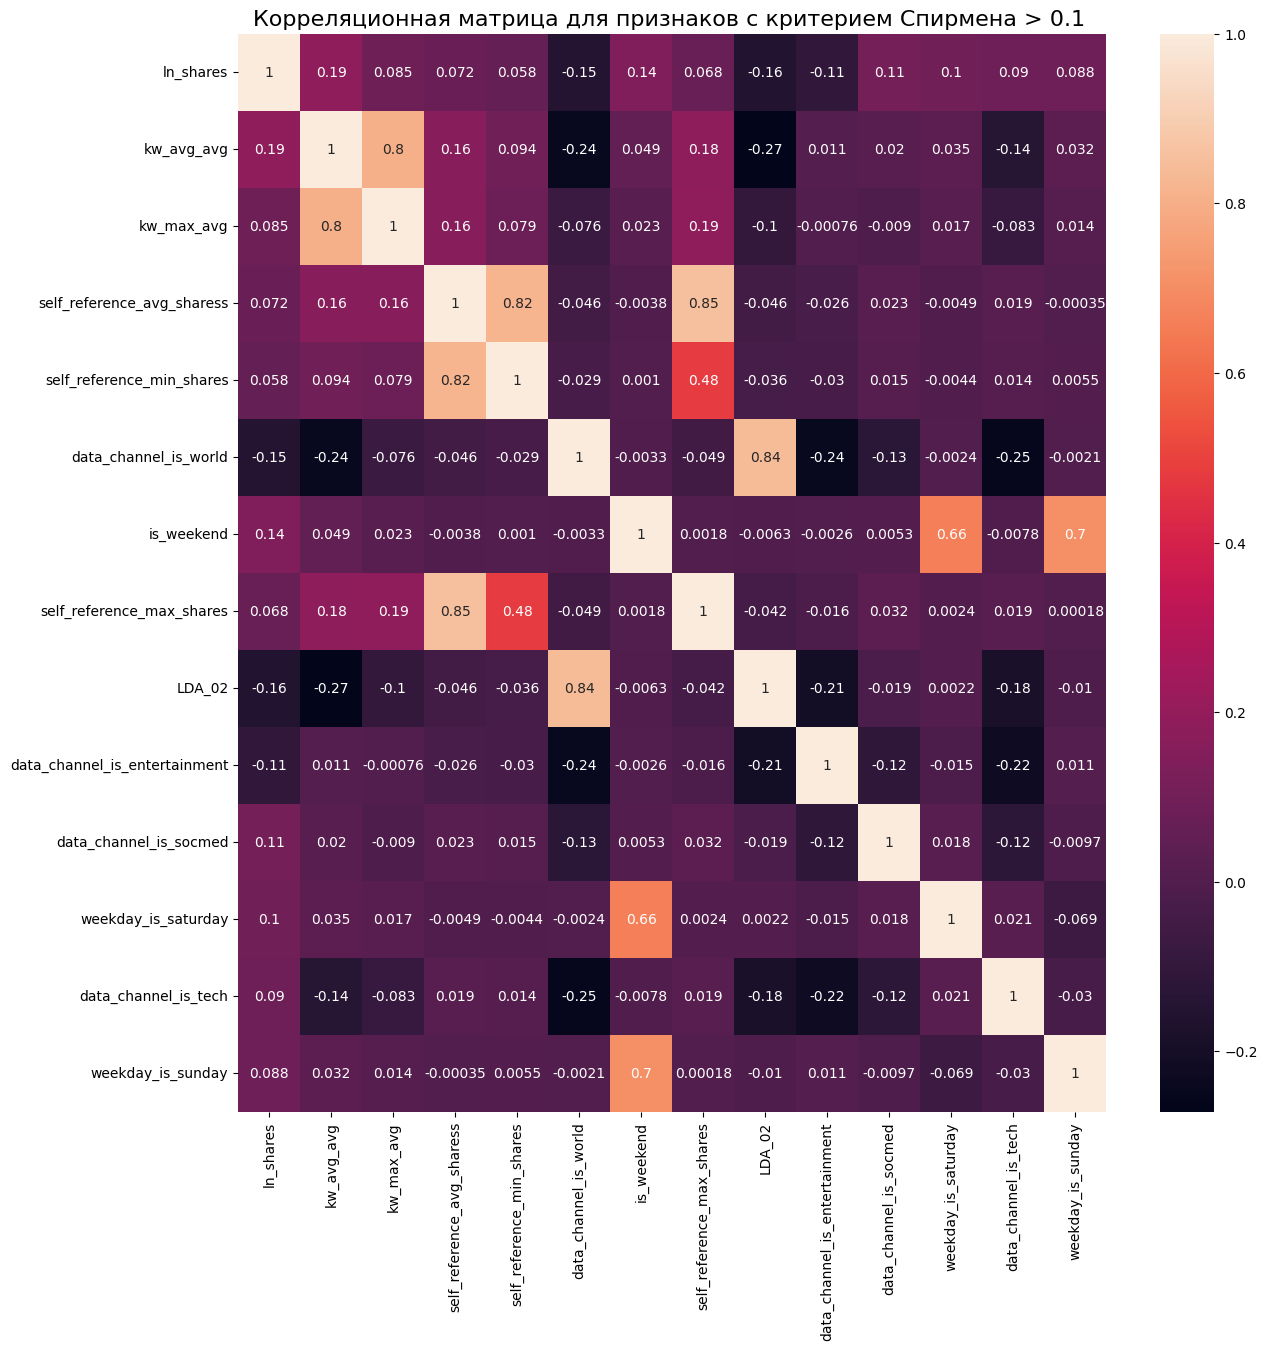

In [92]:
fig, ax = plt.subplots(figsize=(14, 14))
ax = sns.heatmap(data=df_important.corr(), ax=ax, annot=True)
ax.set_title('Корреляционная матрица для признаков с критерием Спирмена > 0.1 ', fontsize=16);